In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
len(coordinates)

1500

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | tsabong
Processing Record 4 of Set 1 | lima
Processing Record 5 of Set 1 | carbondale
Processing Record 6 of Set 1 | mae sai
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | galle
Processing Record 12 of Set 1 | domazlice
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | tuma
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set

Processing Record 39 of Set 4 | vardo
Processing Record 40 of Set 4 | bonthe
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | asyut
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | trelew
Processing Record 47 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | nechi
Processing Record 50 of Set 4 | gorontalo
Processing Record 1 of Set 5 | severobaykalsk
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | muros
Processing Record 4 of Set 5 | kilindoni
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | santa isabel
Processing Record 7 of Set 5 | talavera
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | port-gentil
Processing Record 11 of Set 5 | honningsvag

Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | poltavka
Processing Record 32 of Set 8 | aksarka
Processing Record 33 of Set 8 | vaxjo
Processing Record 34 of Set 8 | shagonar
Processing Record 35 of Set 8 | tabuk
Processing Record 36 of Set 8 | axim
Processing Record 37 of Set 8 | kroya
Processing Record 38 of Set 8 | otatitlan
Processing Record 39 of Set 8 | seondha
Processing Record 40 of Set 8 | indianola
Processing Record 41 of Set 8 | amderma
City not found. Skipping...
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | brigantine
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | ca mau
Processing Record 46 of Set 8 | xuddur
Processing Record 47 of Set 8 | saint-augustin
Processing Record 48 of Set 8 | bhusawal
Processing Record 49 of Set 8 | biak
Processing Record 50 of Set 8 | rungata
City not found. Skipping...
Processing Record 1 of Set 9 | pimentel
Processing Record 2 of Set 9 | umm durman
City not fou

Processing Record 20 of Set 12 | olafsvik
Processing Record 21 of Set 12 | ardalstangen
Processing Record 22 of Set 12 | chongwe
Processing Record 23 of Set 12 | nuuk
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | rach gia
Processing Record 26 of Set 12 | kuala terengganu
Processing Record 27 of Set 12 | safaga
Processing Record 28 of Set 12 | la serena
Processing Record 29 of Set 12 | yulara
Processing Record 30 of Set 12 | portobelo
Processing Record 31 of Set 12 | cody
Processing Record 32 of Set 12 | gunjur
Processing Record 33 of Set 12 | tecate
Processing Record 34 of Set 12 | kattivakkam
Processing Record 35 of Set 12 | bambous virieux
Processing Record 36 of Set 12 | aquiraz
Processing Record 37 of Set 12 | hualmay
Processing Record 38 of Set 12 | portsmouth
Processing Record 39 of Set 12 | ukiah
Processing Record 40 of Set 12 | komsomolskiy
Processing Record 41 of Set 12 | darnah
Processing Record 42 of Set 12 | yenagoa
Processing Record 43 of Set 12 | 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,40.48,99,3,2.01,NZ,2022-02-06 16:37:33
1,Barrow,71.2906,-156.7887,-20.18,69,75,8.05,US,2022-02-06 16:37:33
2,Tsabong,-26.0217,22.4010,83.46,38,98,15.35,BW,2022-02-06 16:37:34
3,Lima,-12.0432,-77.0282,75.38,76,0,5.75,PE,2022-02-06 16:35:24
4,Carbondale,37.7273,-89.2168,36.77,61,0,11.50,US,2022-02-06 16:37:35
5,Mae Sai,20.4335,99.8762,66.43,98,72,1.97,TH,2022-02-06 16:37:35
6,Punta Arenas,-53.1500,-70.9167,68.11,49,75,17.27,CL,2022-02-06 16:34:41
7,Upernavik,72.7868,-56.1549,-9.54,93,100,5.44,GL,2022-02-06 16:37:36
8,Pisco,-13.7000,-76.2167,70.02,83,99,10.36,PE,2022-02-06 16:37:36
9,Tabou,4.4230,-7.3528,82.94,70,89,10.36,CI,2022-02-06 16:37:37


In [10]:
city_data_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[city_data_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-02-06 16:37:33,-46.1927,168.8643,40.48,99,3,2.01
1,Barrow,US,2022-02-06 16:37:33,71.2906,-156.7887,-20.18,69,75,8.05
2,Tsabong,BW,2022-02-06 16:37:34,-26.0217,22.4010,83.46,38,98,15.35
3,Lima,PE,2022-02-06 16:35:24,-12.0432,-77.0282,75.38,76,0,5.75
4,Carbondale,US,2022-02-06 16:37:35,37.7273,-89.2168,36.77,61,0,11.50
5,Mae Sai,TH,2022-02-06 16:37:35,20.4335,99.8762,66.43,98,72,1.97
6,Punta Arenas,CL,2022-02-06 16:34:41,-53.1500,-70.9167,68.11,49,75,17.27
7,Upernavik,GL,2022-02-06 16:37:36,72.7868,-56.1549,-9.54,93,100,5.44
8,Pisco,PE,2022-02-06 16:37:36,-13.7000,-76.2167,70.02,83,99,10.36
9,Tabou,CI,2022-02-06 16:37:37,4.4230,-7.3528,82.94,70,89,10.36


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

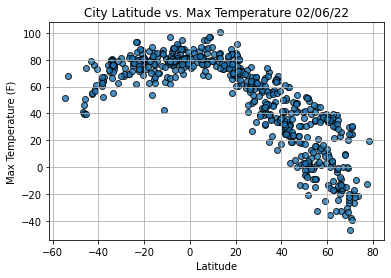

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

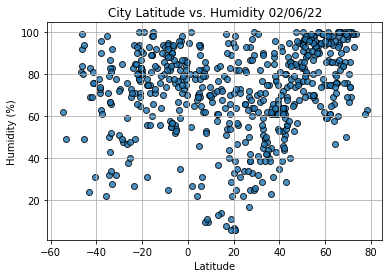

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

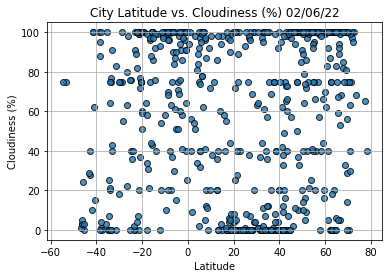

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

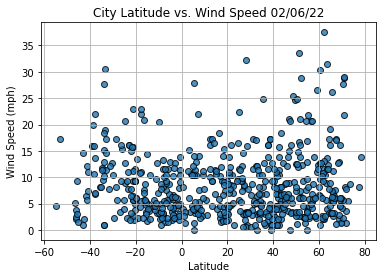

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-02-06 16:37:39
Lat                         -54.8
Lng                         -68.3
Max Temp                    51.46
Humidity                       62
Cloudiness                     75
Wind Speed                   4.61
Name: 13, dtype: object

In [21]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, 
#we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. 
#Executing this code will return either "True" or "False" for all the rows that meet these criteria.
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
580     True
581     True
582     True
583     True
584     True
Name: Lat, Length: 585, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barrow,US,2022-02-06 16:37:33,71.2906,-156.7887,-20.18,69,75,8.05
4,Carbondale,US,2022-02-06 16:37:35,37.7273,-89.2168,36.77,61,0,11.50
5,Mae Sai,TH,2022-02-06 16:37:35,20.4335,99.8762,66.43,98,72,1.97
7,Upernavik,GL,2022-02-06 16:37:36,72.7868,-56.1549,-9.54,93,100,5.44
9,Tabou,CI,2022-02-06 16:37:37,4.4230,-7.3528,82.94,70,89,10.36


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

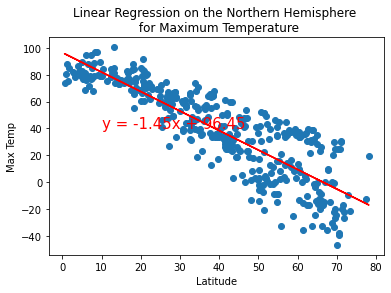

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

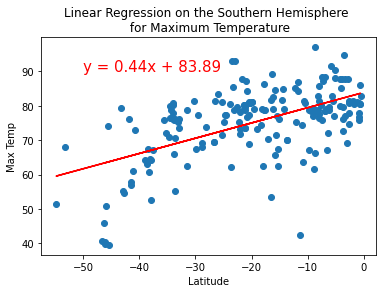

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

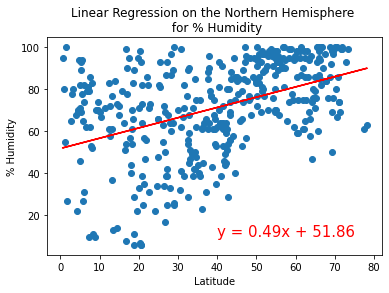

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

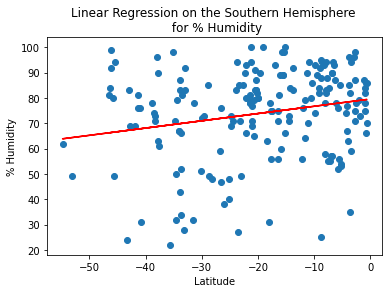

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

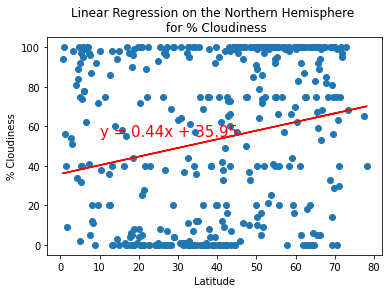

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

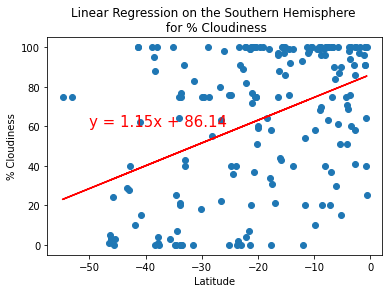

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

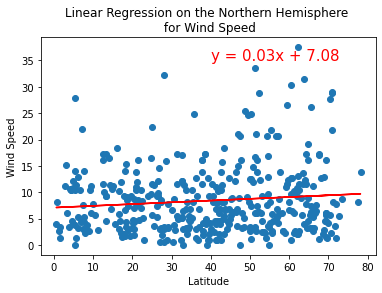

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

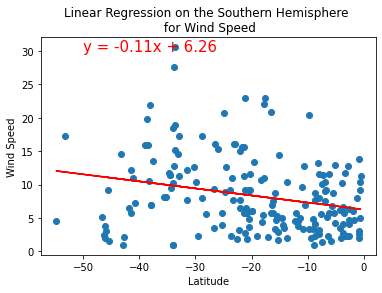

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))